In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib notebook
%matplotlib inline

In [6]:
def Progonka(arr):
    A = [[arr[i][j] for j in range(len(arr[i]))] for i in range(len(arr))]
    n = len(A)

    a, b, c, d = [0], [arr[0][0]], [arr[0][1]], [arr[0][2]]
    for i in arr[1:-1]:
        a.append(i[0])
        b.append(i[1])
        c.append(i[2])
        d.append(i[3])

    a.append(arr[-1][0])
    b.append(arr[-1][1])
    c.append(0)
    d.append(arr[-1][2])

    for i in range(n):
        if math.fabs(b[i]) < math.fabs(a[i]) + math.fabs(c[i]):
            raise Exception

    #   Формирование массивов P, Q (Расчет значений) ((Прямой ход))

    P, Q = [-c[0] / b[0]], [d[0] / b[0]]

    for i in range(1, n):
        P.append(-c[i] / (b[i] + a[i] * P[i - 1]))
        Q.append((d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1]))

    #   Вычисление решения системы (Обратный ход)
    x = [Q[n - 1]]
    for i in range(1, n):
        x.append(P[n - 1 - i] * x[i - 1] + Q[n - 1 - i])

    x = reversed(x)
    return x

In [7]:
a = 0.01

In [10]:
N = 100
T_end = 3
X_end = math.pi
X = np.linspace(0, X_end, N)
T = np.linspace(0, T_end, N)
u = U(X, T)

h = X_end / N
tau = T_end / N
sigma = a*a*tau/h/h
sigma

0.003039635509270133

In [14]:
U = lambda x, t: x + np.exp(-math.pi*math.pi*a*t)*np.sin(math.pi*x)

phi_0 = lambda t: 0
phi_l = lambda t: 1
xi = lambda x: x + math.sin(math.pi*x)

аналитическое решение 

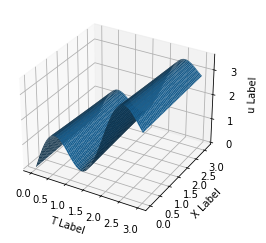

In [15]:
u2 = np.array([[U(i, j) for j in T] for i in X])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u2))

ax.set_xlabel('T Label')
ax.set_ylabel('X Label')
ax.set_zlabel('u Label')
None

явная конечноразностная схема

Text(0.5, 0, 'u Label')

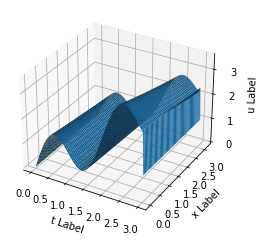

In [18]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(1, len(X) - 1):
    for k in range(len(T) - 1):
        u[j][k+1] = sigma*u[j+1][k] + (1 - 2*sigma)*u[j][k] + sigma*u[j-1][k]
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('t Label')
ax.set_ylabel('x Label')
ax.set_zlabel('u Label')



Неявная схема

Text(0.5, 0, 'u Label')

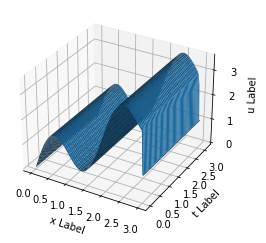

In [19]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [sigma if i != 0 else 0 for i in range(N-2)]
    B = [-(1 + 2*sigma) for i in range(N-2)]
    C = [sigma if i != N-3 else 0 for i in range(N-2)]
    D = [-u[j][k] for j in range(2, N-2)]
    D.insert(0, -(u[1][k] + sigma*phi_0(T[k+1])))
    D.append(-(u[N-1][k] + sigma*phi_l(T[k+1])))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(1, N-1):
        u[j][k+1] = uk[j-1]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')

Явно-неявная схема

In [20]:
teta = 1/2

Text(0.5, 0, 'u Label')

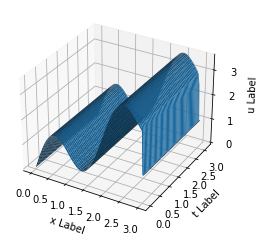

In [21]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for k in range(len(T) - 1):
    u[0][k+1] = phi_0(T[k+1])
    
for k in range(len(T) - 1):
    u[-1][k+1] = phi_l(T[k+1])
    
for j in range(len(X)):
    u[j][0] = xi(X[j])
    
for k in range(len(T) - 1):
    A = [teta*sigma if i != 0 else 0 for i in range(N-2)]
    B = [-(1 + 2*teta*sigma) for i in range(N-2)]
    C = [teta*sigma if i != N-3 else 0 for i in range(N-2)]
    D = [- (1-teta)*sigma*u[j+1][k] - (1 - 2*(1-teta)*sigma)*u[j][k] - (1-teta)*sigma*u[j-1][k] for j in range(2, N-2)]
    D.insert(0, -(teta*sigma*phi_0(T[k+1]) + (1-teta)*sigma*u[2][k] + (1 - 2*(1-teta)*sigma)*u[1][k] + (1-teta)*sigma*phi_0(T[k])))
    D.append(-(teta*sigma*phi_l(T[k+1]) + (1-teta)*sigma*phi_l(T[k]) + (1 - 2*(1-teta)*sigma)*u[N-1][k] + (1-teta)*sigma*u[N-2][k]))
    
    P, Q = [-C[0] / B[0]], [D[0] / B[0]]
    n = len(A)
#     print(len(A), len(B), len(C), len(D))
    
    for i in range(1, n):
        P.append(-C[i] / (B[i] + A[i] * P[i - 1]))
        Q.append((D[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1]))

    uk = [Q[n - 1]]
    
    for i in range(1, n):
        uk.append(P[n - 1 - i] * uk[i - 1] + Q[n - 1 - i])

    uk = list(reversed(uk))
#     print(uk)
    
    for j in range(1, N-1):
        u[j][k+1] = uk[j-1]
    
# np.array(u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('x Label')
ax.set_ylabel('t Label')
ax.set_zlabel('u Label')


Граничные условия третьего рода:

In [22]:
alpha = 0
beta = 1
gamma = 0
delta = 1

Text(0.5, 0, 'u Label')

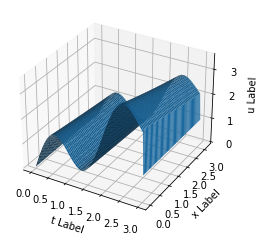

In [23]:
u = [[0 for j in range(len(T))] for i in range(len(X))]

for j in range(len(X)):
    u[j][0] = xi(X[j])

for j in range(1, len(X) - 1):
    for k in range(len(T) - 1):
        u[j][k+1] = sigma*u[j+1][k] + (1 - 2*sigma)*u[j][k] + sigma*u[j-1][k]

for k in range(len(T) - 1):
    u[0][k+1] = -(alpha/h) / (beta - alpha/h) * u[1][k+1] + phi_0(T[k+1]) / (beta - alpha/h)
    
for k in range(len(T) - 1):
    u[-1][k+1] = -(gamma/h) / (delta - gamma/h) * u[-2][k+1] + phi_l(T[k+1]) / (delta - gamma/h)
    
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q, W = np.meshgrid(X, T)
ax.plot_surface(W, Q, np.array(u))

ax.set_xlabel('t Label')
ax.set_ylabel('x Label')
ax.set_zlabel('u Label')